In [1]:
from nltk.tokenize.casual import casual_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import pandas as pd
import string
import os
from timeit import default_timer as timer

input_filepath="../../data/clean/"
pd.set_option('display.max_rows', 150)
filename="trisma2016_cleaned_text_by_lga_and_time_of_day.csv"

In [2]:
tweetdf=pd.read_csv(os.path.join(input_filepath, filename),header=0, keep_default_na=False)
docs = tweetdf[['lga','time_of_day','cleaned']][tweetdf.cleaned != '']
docs.columns = ['LGA','time_of_day','cleaned']
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [3]:
# Set up Vectorizer for use with pre-cleaned and tokenized data
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def smc_tokeniser(doc):
    #return doc.split(' ')
    return [ps.stem(w) for w in doc.split(' ')]

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=smc_tokeniser,
    ngram_range=(1,3),
    max_features=500,
    stop_words='english',
    token_pattern=None)  

In [4]:
tfidf_vectors = tfidf.fit_transform(docs['cleaned'])
print(len(tfidf.vocabulary_))

features = np.array(tfidf.get_feature_names())
print('Number of features', len(features))


500
Number of features 500


In [5]:
def top_tfidf_feats(row, features, top_n=25):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

#Return top features amongst documents in rows indentified by indices in grp_ids
def top_mean_feats(tfs, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = tfs[grp_ids].toarray()
    else:
        D = tfs.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [6]:
top_features = top_mean_feats(tfidf_vectors,features, top_n=100)
top_features

,feature,tfidf
0,2016,0.155094
1,thi,0.149576
2,nsw,0.145779
3,#nswrf,0.116745
4,just,0.081803
5,#nswfire,0.076795
6,wa,0.072848
7,advic,0.071974
8,rd,0.065664
9,like,0.057934


In [7]:
target_df = pd.read_csv(input_filepath+"cleaned_target.csv")
target_df = target_df[(target_df["Type"]=='Rate per 100,000 population') & (target_df['Year'] == 2016)].dropna()
target_df = target_df[['LGA', 'Assault - domestic violence', 'Assault - non-domestic violence', 'Fraud', 
                             'Sexual Offences', 'Malicious damage to property', 'Prohibited weapons offences']]
target_df = target_df[['LGA']].join(np.log(target_df[target_df.columns[1:]])).reset_index(drop=True)
target_df

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
1,Armidale Regional,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
2,Ballina,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093
3,Bathurst Regional,6.084028,6.136396,6.531605,5.300932,7.076881,5.422629
4,Bayside,5.755702,5.613635,6.590862,4.448712,6.371043,4.687338
5,Bega Valley,5.743838,5.833989,5.762531,5.031643,6.697170,5.031643
6,Bellingen,5.632005,5.574846,5.514222,4.756536,6.405194,4.533393
7,Berrigan,5.164719,4.941576,5.095726,4.402579,6.551014,5.634723
8,Blacktown,6.387513,6.116154,6.710620,5.099780,6.888318,5.002186
9,Bland,5.852780,5.752696,5.641471,5.373207,6.614920,5.943752


In [8]:
# Only keep docs for target LGAs:
docs = docs.merge(target_df[['LGA']], on='LGA')
docs

,LGA,time_of_day,cleaned
0,Albury,afternoon,can't say if its personally directed me but wh...
1,Albury,evening,new year resolution find another job so you do...
2,Albury,morning,going to be smashing season this year good luc...
3,Albury,night,#2015bestnine #bestofnine2015 #byebye #2015 #h...
4,Armidale Regional,afternoon,#tnfydh_lqss_ _47_rhby lysw mdhhb whd wl jnsy ...
5,Armidale Regional,evening,bit of rare site over there can't it's overcas...
6,Armidale Regional,morning,woohoo think there's also number of people exc...
7,Armidale Regional,night,tranquility in the park moore park inn boutiqu...
8,Ballina,afternoon,when my lil sister calls her close friends cou...
9,Ballina,evening,if you are feeling too positive about yourself...


In [10]:
# Expand targets to include time_of_day:
target_df = docs[['LGA','time_of_day']].merge(target_df, on='LGA')
target_df

,LGA,time_of_day,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,afternoon,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
1,Albury,evening,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
2,Albury,morning,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
3,Albury,night,6.299733,6.334338,6.263887,5.378146,7.181636,5.756704
4,Armidale Regional,afternoon,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
5,Armidale Regional,evening,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
6,Armidale Regional,morning,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
7,Armidale Regional,night,6.217540,6.481927,6.734923,5.398352,7.703918,5.659568
8,Ballina,afternoon,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093
9,Ballina,evening,5.544054,5.772687,6.223344,5.042361,6.678706,5.027093


In [11]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe whose last column is vector of text docs
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def tfidf_cv(X, y, max_features=None, folds=5, n_important=10):
    assert len(X) == len(y)
    
    if not max_features:
        max_features = len(y)
    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
        
        # Fit tfidf model for train:
        tfidf = TfidfVectorizer(analyzer='word',tokenizer=smc_tokeniser,ngram_range=(1,3),
                            max_features=max_features,stop_words='english',token_pattern=None)  
        X_train = tfidf.fit_transform(X_train_df.iloc[:,-1])
        X_test = tfidf.transform(X_test_df.iloc[:,-1])
        features = np.array(tfidf.get_feature_names())
        
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        for f in range(len(indices)):
            importants[features[indices[f]]] += importances[indices[f]] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test)
        preds = pd.concat([preds,y_test_df])
        
        print('Finished processing',len(preds),'records...')

    return preds, importants

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def tfidf_metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    r2 = r2_score(predictions.iloc[:,-2],predictions.iloc[:,-1])
    rmse = np.sqrt(mean_squared_error(predictions.iloc[:,-2],predictions.iloc[:,-1]))
    print('R2:',r2)
    print('RMSE:',rmse)

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1                   ]
    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()    

Try increasing max features to test the boundaries of where overfitting begins...

Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 995.3545495460276 seconds
MOST IMPORTANT FEATURES:
sydney 0.0806858783897
nsw 0.0721172898488
nov 2016 0.0637234571844
grass 0.0423695248348
#nswrf 0.0367092821065
dec 2016 0.0356068209074
rd 0.0185826815314
south 0.0155424406407
way 0.0130457132496
dec 0.0130351443805
😂 0.0127127084038
beach 0.0126778729861
post 0.0119362882537
beauti 0.0107214313097
#bushfir #nswfire 0.0100952291412
2016 0.00939874942266
fall 0.00910310673866
#nswfire 0.00908286659551
nov 0.00894425291918
park 0.00798417079795
R2: 0.399299221401
RMSE: 0.483141394064


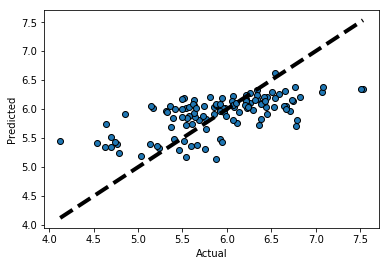

Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 954.6529838019051 seconds
MOST IMPORTANT FEATURES:
#sydney 0.0748597726561
nsw 0.0677836275237
sydney 0.0614896811693
st 0.035746764578
dec 2016 0.0345603166082
#nswrf 0.0277366450345
#australia 0.0206898877011
#grassfir #nswfire 0.0154844819022
nov 2016 0.0115067505991
hous 0.0100206340306
grass 0.00978318635634
dec 0.00936261504891
#grassfir 0.00900223147941
hwi 0.00895305747854
nov 0.00885141533133
god 0.00837385268215
2016 0.00785175865664
aug 2016 0.00750967317371
rd 0.00714939415232
#bushfir #nswfire 0.00704847569281
R2: 0.474969424731
RMSE: 0.451686851309


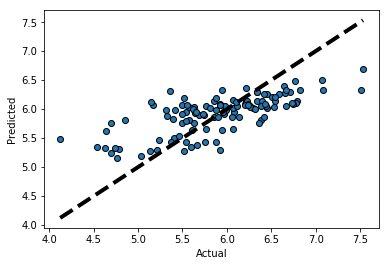

In [14]:
for f in [200,500]:
    start = timer()
    predictions, importants = tfidf_cv(docs, target_df[['LGA','time_of_day','Assault - domestic violence']], max_features=f, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    # Need to aggregate preds from time_of_day back up to LGA level:
    predictions = predictions[['LGA','time_of_day','Assault - domestic violence',
                               'predicted']].groupby(['LGA']).agg({'Assault - domestic violence': lambda x: np.mean(x),
                                                                  'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(predictions, importants)

Run an analysis on all 6 target variables. Store the results for later use in other models:

Assault - domestic violence
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1003.5538298329338 seconds
MOST IMPORTANT FEATURES:
dec 2016 0.0637046671419
nsw 0.0599160711386
#sydney 0.057064155045
st 0.0495562546708
#nswrf 0.0327379665787
nov 2016 0.0263705592086
#australia 0.0218486276214
sydney 0.0218330759257
grass 0.0213399485843
#grassfir 0.0132902945202
#grassfir #nswfire 0.0125667461032
dec 0.0101074007307
clear 0.00942025854431
#nswfire 0.00872060047983
weekend 0.00851770141135
hwi 0.00799913532669
advic grass 0.00696001368586
👍 0.00627266488423
30 0.00600737795666
set 0.00598372390676
R2: 0.440310842128
RMSE: 0.466357104972


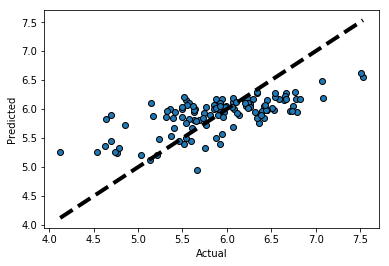

Assault - non-domestic violence
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1015.5548793920316 seconds
MOST IMPORTANT FEATURES:
st 0.0599876394678
sydney 0.0553913671568
#sydney 0.040859095023
#nswfire 0.0249065560976
#nswrf 0.0175738339599
nsw 0.0155310378453
#australia 0.0132883661105
dec 2016 0.0126574101479
rd 0.0105365831194
talk 0.00942930991817
learn 0.00913148212121
clear 0.00862578630259
finish 0.00812724943243
hwi 0.00798790653498
#bushfir 0.00791276745913
use 0.00776204499905
aug 2016 0.00757824532357
#bushfir #nswfire 0.00739177667945
south 0.00708286585493
#grassfir #nswfire 0.00689779310022
R2: 0.410514495388
RMSE: 0.425973365249


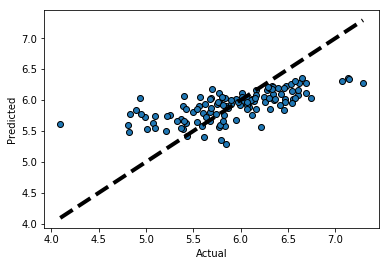

Fraud
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1011.5020174921956 seconds
MOST IMPORTANT FEATURES:
#nswrf 0.060039594304
tonight 0.0480832553475
ne 0.0290651265664
2016 0.0280572194671
#sydney 0.024488096374
hwi 0.023266093763
rd 0.0146365099119
happi 0.0143419577334
hey 0.0142225599356
#nswrf #grassfir 0.0130288646743
tri 0.0122342314592
hous 0.0115120719857
sydney 0.0111673961783
nsw 0.0108937378281
listen 0.0108477429029
new south 0.0102345149847
you'r 0.0101374425198
park 0.00998365182494
new 0.00972467197949
actual 0.00905102191797
R2: 0.447857868935
RMSE: 0.375707074225


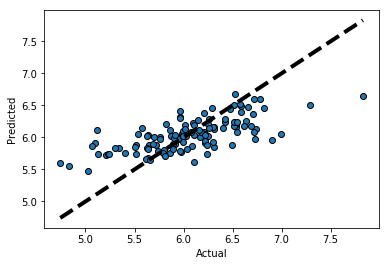

Sexual Offences
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1023.522090589162 seconds
MOST IMPORTANT FEATURES:
#sydney 0.136085005521
#nswrf 0.0952461205045
nov 2016 0.0527769787533
nsw 0.027016624517
#nswfire 0.0269255719479
sydney 0.0225734423409
hazard 0.0158654641223
#nsw 0.0153444840594
nov 0.0139608182955
dec 2016 0.0137642580515
great 0.0100311757134
state 0.00998975690648
advic bush 0.0088621557469
st 0.0087835918882
👍 0.00816902146139
#australia 0.00786817801218
point 0.00740586889309
lake 0.00620997095814
sunday 0.00603837626293
new south wale 0.00590771574954
R2: 0.493063913803
RMSE: 0.363674999107


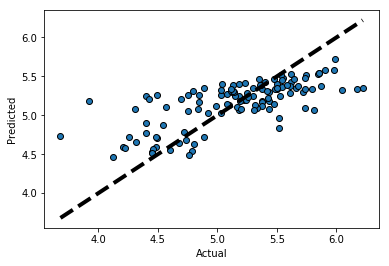

Malicious damage to property
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1009.5914358180016 seconds
MOST IMPORTANT FEATURES:
#sydney 0.0970952761073
#nswfire 0.0884126211735
st 0.0672873480528
sydney 0.0397876427733
dec 2016 0.0216459826419
#grassfir #nswfire 0.0205127212736
#nswrf 0.0197947479098
nov 2016 0.0167522571957
nsw 0.0154214296137
grass 0.0140297622529
new 0.0109540757281
hwi 0.0104253113559
#bushfir #nswfire 0.0097772674145
#nsw 0.00815893917995
#australia 0.00760365216698
advic bush 0.00748968489907
advic 0.00708913523854
bush 0.00690903216829
way 0.00637429528923
#bushfir 0.00634893540225
R2: 0.507935053695
RMSE: 0.365824763338


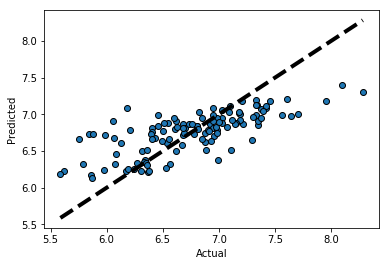

Prohibited weapons offences
Finished processing 96 records...
Finished processing 192 records...
Finished processing 288 records...
Finished processing 384 records...
Finished processing 480 records...
Finished TF-IDF 5 fold cross validation in 1002.4075700179674 seconds
MOST IMPORTANT FEATURES:
#nswrf 0.229305396423
#sydney 0.158086575957
nsw 0.0375146633747
sydney 0.0363380238796
st 0.0174504345409
everyon 0.0173212699189
south 0.0155091860389
2016 0.0110577294172
beach 0.0106663826016
hazard 0.00820871213199
that' 0.00792060361706
god 0.00727630583702
lane 0.00667406394469
read 0.00652696849901
sure 0.00620932459554
red 0.00574639604715
rd 0.00560997569358
awesom 0.00546534517899
stay 0.00545558583837
new south 0.00516217002714
R2: 0.683667677225
RMSE: 0.437148473839


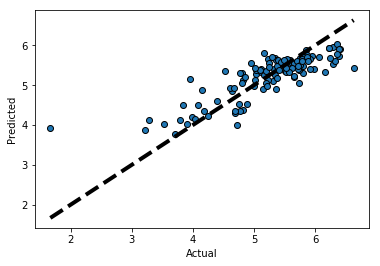

In [17]:
tfidf_output = pd.DataFrame()
for target in target_df.columns[2:]: # Start from 2 as we have a 2 column index
    print(target)
    start = timer()
    preds, importants = tfidf_cv(docs, target_df[['LGA','time_of_day',target]], max_features=500, folds=5)
    end = timer()
    print('Finished TF-IDF 5 fold cross validation in',end-start,'seconds')
    # Need to aggregate preds from time_of_day back up to LGA level:
    preds = preds[['LGA','time_of_day',target,
                    'predicted']].groupby(['LGA']).agg({target: lambda x: np.mean(x),
                                                    'predicted': lambda x: np.mean(x)}).reset_index()
    tfidf_metrics(preds, importants)
    if len(tfidf_output.columns) == 0:
        tfidf_output['LGA'] = preds['LGA']
    tfidf_output['TF-IDF '+target] = preds[preds.columns[-1]]

In [19]:
tfidf_output.to_csv("../../data/clean/tfidf_by_lga_and_time_of_day_2016_predictions.csv",index=False)